# 데이터 전처리

In [182]:
import pandas as pd
import numpy as np
from io import StringIO

In [183]:
csv_data=\
    '''A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0'''
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [184]:
df.isna().sum()
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [185]:
# 사이킷런의 추정기 주입전 dataframe에 values의 속성을 이용하면 넘파이의 배열을 얻을 수 있다
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [186]:
# 결측치 삭제(매개변수 axis= 1,0)
# 1이면 열 결측치가 있는 열 삭제, 0이면 결측치가 있는 행 삭제
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [187]:
# how ='all'이라는 매개변수 이용--> 모든 열이 NaN인 행을 삭제한다
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [188]:
# thresh = n  실수 값이 n보다 작은 행을 삭제한다
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [189]:
# subset=['특정행']--> 특정행을 삭제한다
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


#### from sklearn.impute import SimpleImputer
    - miising_values 의 기본값 : np.nan
    - strategy : 'mean' , 'most_frequent' , 'constant'
    - axis=의 매개변수 삭제 ,  계산은 axis=0처럼 열의 평균임!

In [190]:
# 특성 열의 전체 평균으로 결측치(누락값) 대체하기

from sklearn.impute import SimpleImputer
simr= SimpleImputer(missing_values=np.nan, strategy='mean')
simr=simr.fit(df.values)
imputed_data =simr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# 사이킷런 추정기 API
    - fit 매서드를 사용하여 훈련 데이터에서 포델 피라미터를 학습
    - transform 매서드를 사용하여 학습한 피라미터로 데이터를 변환한다
    - 변환 하는 데이터 수는 모델 학습에 사용한 데이터의 특성 개수와 같아야 한다
    - .fit_transform()을 사용하면 fit, transform 매서드를 합쳐 놓은 단축 매서드이다

# 범주형 데이터 다루기

In [191]:
df=pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])
df.columns=['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### 순서 특성 매핑
    - 학습 알고리즘이 순서 특성을 올바르게 인식하려면, 범주형의 문자열 값을 정수로 바꿔줘야한다
    - size의 특성은 범주형 데이터
    

In [192]:
size_mapping = {
    'XL': 3,
    'L' : 2,
    'M' : 1
}



In [193]:
df['size']=df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [194]:
## 다시 거꾸로 매핑하려면 딕셔너리 inv_size_mapping(v: k for k,v in size_mapping.items()) 를 사용한다


### 클래스 레이블 인코딩
    - classlabel은 순서가 없는 명목형 data
    - 사이킷런의 분류 추정기 대부분 클래스 레이블을 정수로 반환해 주지만
    - 사소한 실수를 방지하기 위해 클래스 레이블을 정수 배열로 전달하는 것은 좋은 습관
    - enumerate 반복가능한 객체(문자열, 리스트, 넘파이, 어레이)를 입력받아 인덱스와 값의 튜플을 차례대로 반환하는 파이썬의 내장함수

In [195]:
class_mapping ={label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [196]:
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


### 사이킷럿에 구현된 labelEncoder 클래스
    - labelEncoder은 문자열 레이블을 정수로 변환해줌
    - inverse.transform()을 바꾸기 전으로 돌아갈 수 있다
    - from sklearn.preprocessing import LabelEncoder
    - 타깃 레이블을 인코딩하기 위한 클래스이므로, 입력 데이터로 1차원 배열을 기대한다


In [197]:
from sklearn.preprocessing import LabelEncoder

df=pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])
df.columns=['color','size','price','classlabel']
class_le =LabelEncoder()
y= class_le.fit_transform(df['classlabel'].values)
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [198]:
from sklearn.preprocessing import LabelEncoder
X= df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0]=color_le.fit_transform(X[:,0])
X

array([[1, 'M', 10.1],
       [2, 'L', 13.5],
       [0, 'XL', 15.3]], dtype=object)

#### 이렇게 변환한다면, 학습 알고리즘이 green이 blue,red보다 크다고 크다고 가정할 것이다
    - 윈-핫 인코딩
    - 순서 없는 특성에 들어 있는 고유한 값마다 새로운 dummy 특성을 만든다
    - 희소 행렬을 반환
        - toarray로 일반 넘파이 배열로 변환
        - 대량의 데이터 셋
        - 배열에 0 이 많이 포함되어 있을때 유용하다

## 윈- 핫 인코딩
    - ColumnTransformer()
    - 데이터셋에 있는 고유한 정수 또는 문자열을 카테고리로 지정
    - categories의 매개변수를 auto로 지정하면 경고 메시지를 피할 수 있다


In [199]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
oh_enc= OneHotEncoder(categories='auto')

col_trans= ColumnTransformer([('oh_enc', oh_enc,[0])], remainder ='passthrough')
col_trans.fit_transform(X)

array([[0.0, 1.0, 0.0, 'M', 10.1],
       [0.0, 0.0, 1.0, 'L', 13.5],
       [1.0, 0.0, 0.0, 'XL', 15.3]], dtype=object)

#### 더 쉽게 pandas의 get_dummies 메서드를 사용하기
    - pd.get_dummies(df[[행1,행2,...]],colums=['더미화할 행])

In [200]:
pd.get_dummies(df[['price','size','color']],columns=['color'])

,price,size,color_blue,color_green,color_red
0,10.1,M,0,1,0
1,13.5,L,0,0,1
2,15.3,XL,1,0,0


##### 다중공산성 문제
    - 어떤 알코리즘에서(역행렬을 구해야 하는 경우), 특성 간의 상관관계가 높으면 역행렬을 계산하기 어려워짐
    - 변수 간의 상관관계를 감소하려면 윈-핫 인코딩에서 특성 열 하나를 삭제한다
    - drop_first = True라는 매개변수 이용
    ------------------------------------------------------------------------------------------------
    - OneHotEncoder는 열을 삭제하는 매개변수가 없다 --> 슬라이싱을 이용 

In [201]:
pd.get_dummies(df[['price','size','color']],columns=['color'],drop_first=True)

,price,size,color_green,color_red
0,10.1,M,1,0
1,13.5,L,0,1
2,15.3,XL,0,0


## 데이터 셋을 훈련 세트와 테스트 세트로 나누기

In [202]:
df_wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns=['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
                 'Nonflacanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/oD315 of diluted wines','Proline']
print('클래스 레이블',np.unique(df_wine['Class label']))
df_wine.head()
# 클래스 레이블은 와인 포도 품종을 의미한다

클래스 레이블 [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflacanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/oD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### from sklearn.model_selection from train_test_split
    - X,y에 특성을 할당
    - train_test_split 함수를 사용해서 X,y를 랜덤하게 훈련 세트와 테스트 세트로 분할
    - test_size =0.3으로 30프로가 X_test,y_test에 30퍼센트가 할당됨
    - stratify = y 로 훈련세트와 테스트 세트에 있는 클래스 비율이 원본 데이터셋과 동일하게 유지

In [203]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:] ,  df_wine.iloc[:,0]
#print(X,y)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

print(len(X_train),len(X_test))
print(54/(124+54))

124 54
0.30337078651685395


### 스케일링
    - 최대-최소 스케일 변환
    - 정규화 표준화

In [204]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm=mms.fit_transform(X_test)

# 데이터 프레임으로 만들고, describe()함수를 이용해 최대값, 최솟값을 확인해 본다.

pd.DataFrame(X_test_norm,columns=['Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
                 'Nonflacanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/oD315 of diluted wines','Proline']).describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflacanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/oD315 of diluted wines,Proline
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.563988,0.376360,0.618115,0.499435,0.249886,0.409764,0.450994,0.362434,0.371467,0.394228,0.363185,0.495846,0.355095
std,0.231788,0.265082,0.181995,0.198735,0.181332,0.234760,0.287806,0.266649,0.177680,0.235705,0.209976,0.284428,0.247257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.396577,0.189353,0.538462,0.335366,0.098765,0.218182,0.197409,0.168367,0.255226,0.210106,0.205128,0.205323,0.163090
50%,0.558036,0.265499,0.612179,0.496951,0.209877,0.405455,0.484756,0.255102,0.365854,0.353191,0.380342,0.557034,0.304721
75%,0.735119,0.571429,0.735577,0.657012,0.367284,0.559091,0.692073,0.530612,0.484321,0.528723,0.502137,0.754753,0.488197
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [205]:
from sklearn.preprocessing import StandardScaler
stdsc= StandardScaler()
X_train_std= stdsc.fit_transform(X_train)
X_test_std= stdsc.fit_transform(X_test)

# 데이터 프레임으로 만들고 , descibe()함수를 이용해 평균, 표준편차 값을 확인해본다

pd.DataFrame(data= X_test_std,columns=['Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
                 'Nonflacanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/oD315 of diluted wines','Proline']).describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflacanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/oD315 of diluted wines,Proline
count,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
mean,1.149543e-15,5.139921e-16,-7.627643e-16,-1.511137e-16,-4.759567e-16,3.268990e-16,2.261565e-17,2.426043e-16,8.198175e-16,4.646489e-16,-1.891491e-16,1.295260e-15,-1.110223e-16
std,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00
min,-2.456052e+00,-1.433119e+00,-3.428222e+00,-2.536669e+00,-1.390998e+00,-1.761847e+00,-1.581720e+00,-1.371982e+00,-2.110289e+00,-1.688249e+00,-1.745887e+00,-1.759678e+00,-1.449624e+00
25%,-7.290392e-01,-7.120931e-01,-4.417778e-01,-8.333213e-01,-8.412168e-01,-8.237394e-01,-8.893709e-01,-7.346329e-01,-6.603588e-01,-7.884851e-01,-7.598026e-01,-1.031019e+00,-7.838311e-01
50%,-2.592139e-02,-4.221430e-01,-3.291936e-02,-1.261739e-02,-2.227125e-01,-1.853052e-02,1.184112e-01,-4.063014e-01,-3.189076e-02,-1.757345e-01,8.247807e-02,2.171486e-01,-2.056429e-01
75%,7.452401e-01,7.427892e-01,6.514741e-01,8.003440e-01,6.535020e-01,6.420535e-01,8.455113e-01,6.366342e-01,6.411143e-01,5.759670e-01,6.679658e-01,9.188210e-01,5.433736e-01
max,1.898742e+00,2.374721e+00,2.118032e+00,2.542404e+00,4.175541e+00,2.537812e+00,1.925469e+00,2.413487e+00,3.570666e+00,2.594172e+00,3.061275e+00,1.789165e+00,2.632736e+00


## 차원 축소를 위한 PCA 알고리즘
    - 주성분 분석
    - 고차원 데이터에서 분산이 가장 큰 방향을 찾고, 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영
        1. d차원 데이터셋을 표준화,전처리 함
        2. 공분산 행렬을 만든다
        3. 공분산 행렬을 고유벡터, 고유값으로 분해
        4. 고윳값을 내림차순으로 정렬하고, 그에 해당하는 고유 벡터의 순위를 매긴다
        5. 고윳값이 가장 큰 k개의 고유 벡터를 선택!-> k는 새로운 특성 부분 공간의 차원(k<d)
        6. 최상위 k개의 고유 벡터로 투영 행렬 W를 만든다
        7. 투영 행렬 W(d*k)를 사용해서 d차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환한다

### 주성분 추출 단계
    1. 데이터를 표준화 전처리
    2. 공분산 행렬
    3. 공분산 행렬의 고윳값과 고유 벡터 구하기
    4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매긴다.

1. 데이터 표준화 전처리

In [206]:
df_wine=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns=['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
                 'Nonflacanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/oD315 of diluted wines','Proline']

from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values ,  df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
# 특성을 표준화 전처리하기
from sklearn.preprocessing import StandardScaler
stdsc= StandardScaler()
X_train_std= stdsc.fit_transform(X_train)
X_test_std= stdsc.fit_transform(X_test)



2. 공분산 행렬
    - d X d 차원의 대칭 행렬로 특성 상호 간의 공분산을 저장
    - 열의 평균을 구하고 원래 행렬에서 빼줘서, 중심화된 데이터 행렬 mu를 구한다
    - Cov= 1/(n-1)  X  중심화된데이터 행렬  X 중심화된데이터 행렬의 전치 행렬
    - np.cov()  --> 안에 rowvar 매개변수의 기본값(True)에 따라 각 행을 하나의 변수(feature)로 취급하게 됩니다. 
    - np.cov()  --> 안에 전치 행렬 넣기

3. 공분산 행렬의 고윳값과 고유 벡터 구하기

In [207]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals , eigen_vecs = np.linalg.eig(cov_mat)
print('\n 고유값 \n%s' %eigen_vals)
print('\n 고유벡터 \n%s' %eigen_vecs)



 고유값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]

 고유벡터 
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
   2.90625226e-01 -2.99096847e-01 -7.90529293e-02  3.68176414e-01
   3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
  -8.95378697e-02 -6.27036396e-01  2.74002014e-01  1.25775752e-02
  -1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
   1.60834991e-01 -3.89128239e-04 -1.32328045e-01 -1.77578177e-01
  -3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
  -5.15873402e-02  4.05836452e-02 -2.23999097e-01  4.40592110e-01
   2.43373853e-01 -1.30485780e-01 -4.18953989e-01 -1.108

4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매긴다.
    - 공분산 행렬의 고유값은 해당 데이터 세트의 주성분을 설명하는데 사용되며, 각 주성분의 중요도를 나타낸다
    - 공분산 행렬의 고유값이 클수록 해당 주성분이 데이터에서 설명하는 분산이 크다는 것을 의미한다.
    - PCA(Principal Component Analysis)에서 고유값이 분산으로 여겨지는 이유
    - 분산 행렬의 고유값은 데이터의 분산을 나타내는 것이 아니라, 데이터의 주성분과 그 중요도를 나타내는데 사용된다.

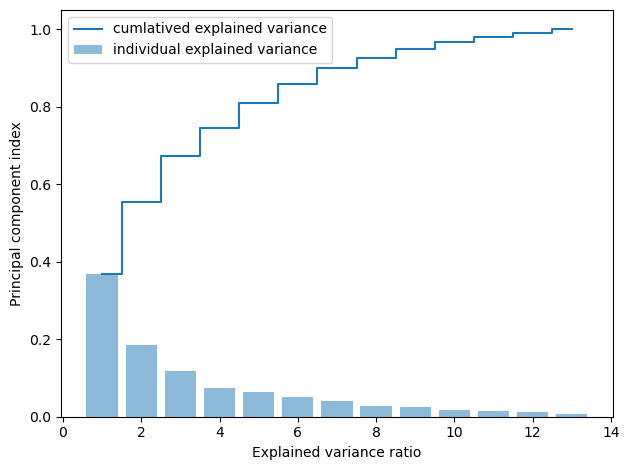

In [208]:
# 전체 분산의 합
tot= sum(eigen_vals)
var_exp= [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)                    # 누적합

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,14),cum_var_exp , where='mid',label='cumlatived explained variance')
plt.xlabel('Explained variance ratio')
plt.ylabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()                  # plt.tight_layout() 함수를 사용하면, subplot들이 서로 충돌하지 않도록 간격을 자동으로 조정해줌
plt.show()

### 특성 변환
    - 공분산 행렬을 고유 벡터와 고윳값 쌍으로 분해한 후, Wine 데이터셋을 새로운 주성분 축으로 변환하는 단계
        1. 고윳값이 가장 큰 k개의 고유 벡터를 선택(k<d)-->이때 k는 새로운 k타원의 특성 부분 공간
        2. 최상위 k개의 고유 벡터로 투영행렬 W를 만든다
        3. 투영 행렬 W를 사용하여 d차원 데이터셋 X를 k차원의 특성 부분 공간으로 변환한다 

- 분산 행렬의 고유벡터는 해당 데이터셋의 분산과 공분산을 가장 잘 설명하는 방향 벡터를 나타내며, 고유값은 그 방향으로 설명 가능한 분산의 크기를 나타냅니다. 이렇게 구한 고유벡터와 고유값을 이용하여 PCA를 수행할 수 있습니다.

In [209]:
# (고윳값,고유벡터) 튜플의 리스트를 만든다
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고윳값, 고유벡터) 튜플로 정렬한다
eigen_pairs.sort(key=lambda k :k[0],reverse=True)
eigen_pairs[0][1]

array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651])

In [210]:
#  np.hstack() : Numpy의 라이브러리 함수로 주어진 배열을 수평적으로 결합하여 새로운 배열을 생성
#  np.newaxis  : Numpy의 새로운 축을 추가하기 위해 사용되는 인덱싱 개체, 차원을 확장시킴

w=np.hstack((eigen_pairs[0][1][:,np.newaxis],
            eigen_pairs[1][1][:,np.newaxis]))
print('투영행렬W:\n',w)

투영행렬W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


### 투영 행렬 W를 사용하여 d차원 데이터셋 X를 k차원의 특성 부분 공간으로 변환한다 
    - z= xW
    - dot(W) : Numpy의 행렬 곱

In [211]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [246]:
X_train_pca= X_train_std.dot(w)
len(X_train_pca)

124

In [213]:
np.unique(y_train)

array([1, 2, 3], dtype=int64)

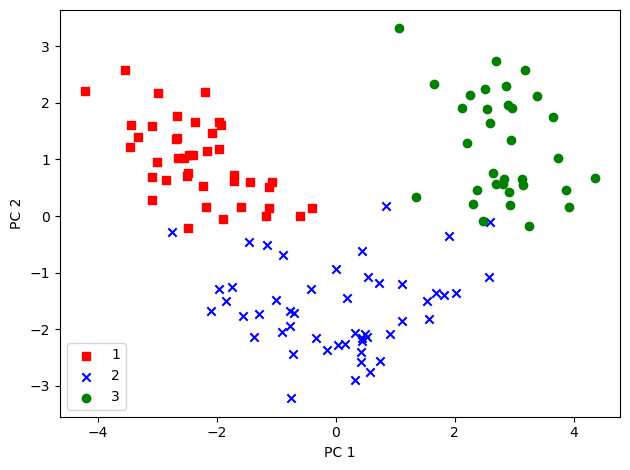

In [214]:
colors =['r','b','g']
markers = ['s','x','o']

for l, c, m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1],
                c=c , label=l,marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# 사이킷런의 PCA클래스의 사용법

In [250]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    #마커와 경계를 그린다
    markers=('s','x','o','^','v')
    colors= ('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    #결정 경계를 그린다
    X1_min, X1_max =X[:,0].min() -1, X[:,0].max()+1
    X2_min, X2_max =X[:,1].min() -1, X[:,1].max()+1
    xx1,xx2 =np.meshgrid(np.arange(X1_min,X1_max,resolution),
                         np.arange(X2_min,X2_max,resolution))
    Z =classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    #클래스 샘플을 표시한다
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.6,
                    c=cmap.colors[idx],
                    edgecolors='black',
                    marker=markers[idx],
                    label=cl)

In [245]:
len(y)

178

C:\Users\dgh06\AppData\Local\Temp\ipykernel_24636\4172356310.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


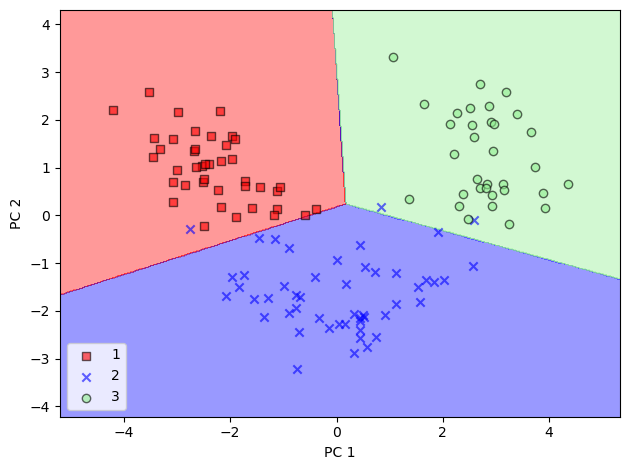

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca =  pca.fit_transform(X_test_std)
lr=LogisticRegression(solver='liblinear',multi_class='auto')
lr.fit(X_train_pca,y_train)

plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [253]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    #마커와 경계를 그린다
    markers=('s','x','o','^','v')
    colors= ('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    #결정 경계를 그린다
    X1_min, X1_max =X[:,0].min() -1, X[:,0].max()+1
    X2_min, X2_max =X[:,1].min() -1, X[:,1].max()+1
    xx1,xx2 =np.meshgrid(np.arange(X1_min,X1_max,resolution),
                         np.arange(X2_min,X2_max,resolution))
    Z =classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    #클래스 샘플을 표시한다
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0]*(-1),
                    y=X[y==cl,1]*(-1),
                    alpha=0.6,
                    c=cmap.colors[idx],
                    edgecolors='black',
                    marker=markers[idx],
                    label=cl)

C:\Users\dgh06\AppData\Local\Temp\ipykernel_24636\4139705441.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0]*(-1),


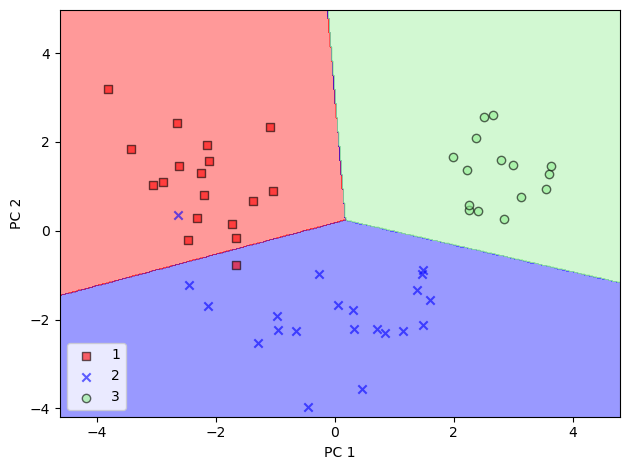

In [254]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()